In [636]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [638]:
#load the data
store = pd.read_csv('/Users/nadianesib/Desktop/rossmann-store-sales/store.csv')
sub = pd.read_csv('/Users/nadianesib/Desktop/rossmann-store-sales/sample_submission.csv')
train = pd.read_csv('/Users/nadianesib/Desktop/rossmann-store-sales/train.csv', low_memory=False)
test = pd.read_csv('/Users/nadianesib/Desktop/rossmann-store-sales/test.csv')

# understand your data

In [710]:
#preview the data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [517]:
sub.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [712]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [521]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [523]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [525]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [527]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# data cleaning

In [530]:
#check for missing value

In [532]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [534]:
# Check for missing values
missing_data = store.isnull().sum()
missing_percentage = (missing_data / len(store)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])

                           Missing Values  Percentage
CompetitionDistance                     3    0.269058
CompetitionOpenSinceMonth             354   31.748879
CompetitionOpenSinceYear              354   31.748879
Promo2SinceWeek                       544   48.789238
Promo2SinceYear                       544   48.789238
PromoInterval                         544   48.789238


In [536]:
#handle missing data

In [538]:
# mean Imputation replace the missed value with average of the given data

store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mean())
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(store['Promo2SinceWeek'].mean())
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean())
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean())

In [540]:
# Mode Imputation (for categorical features)
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode()[0])

In [542]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [544]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [499]:
# Mean imputation for numerical features
store[''] = store['feature'].fillna(store['feature'].mean())

In [546]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [303]:
#handle duplicates

In [305]:
# Check for duplicates
duplicates = store[store.duplicated()]
duplicates

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# univariate analysis to analyze individual features.

In [318]:
# numerical features

In [387]:
# Select numerical features
num_vars = store.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_vars)

['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [389]:
null_counts = store[num_vars].isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


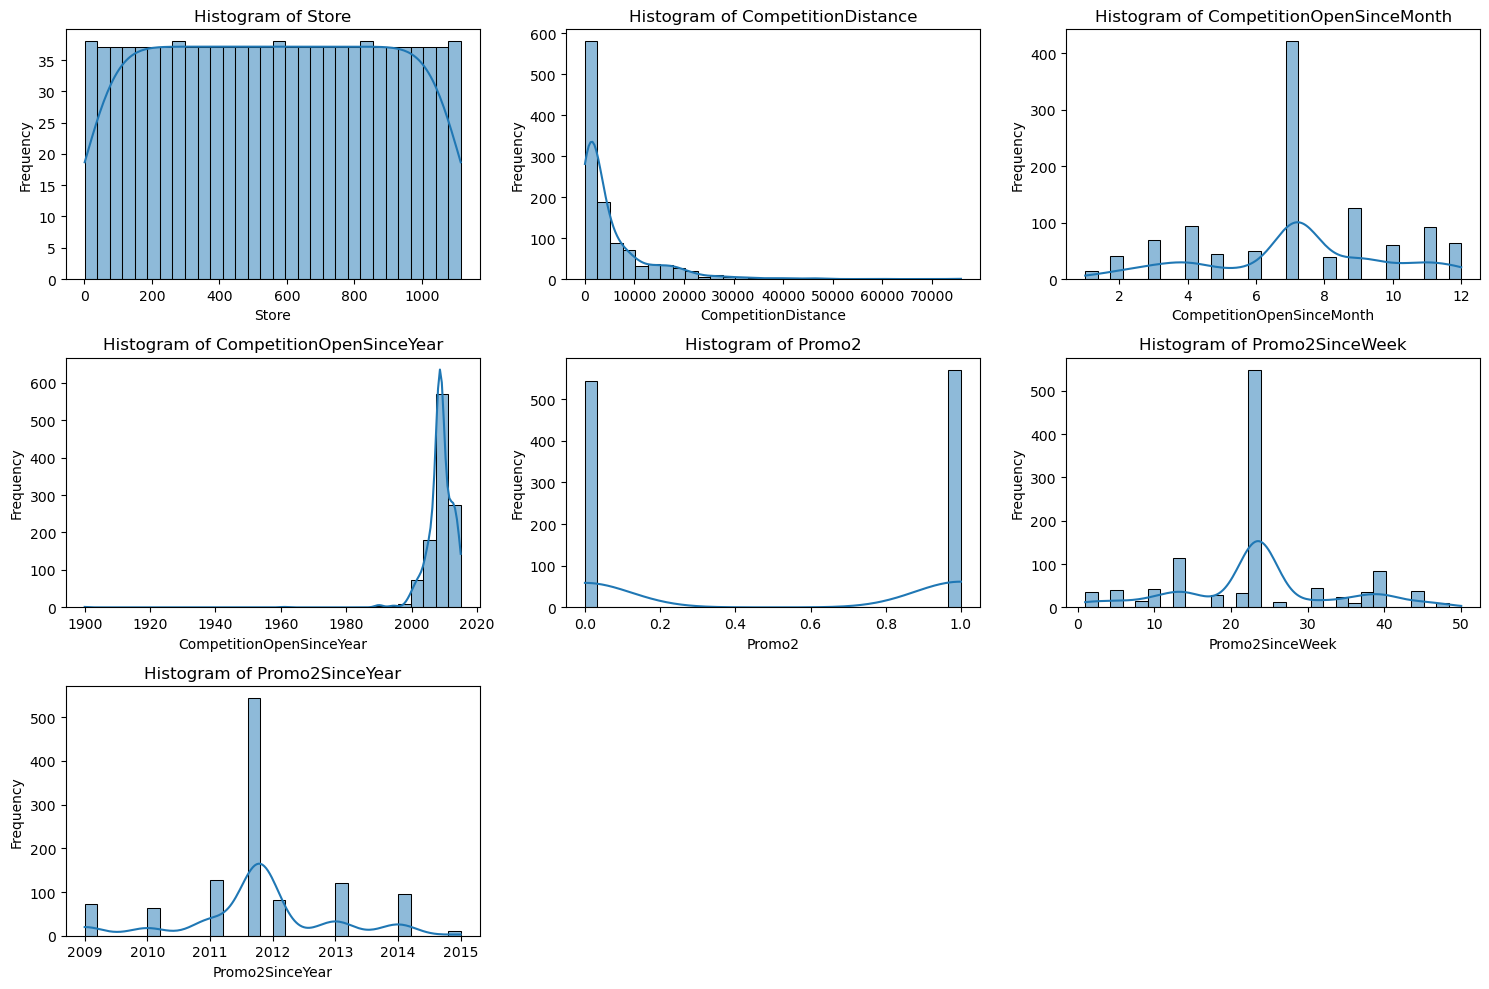

In [371]:
# Loop through all numerical columns and create histograms
num_vars = store.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)  # Adjust the layout based on number of variables
    sns.histplot(store[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


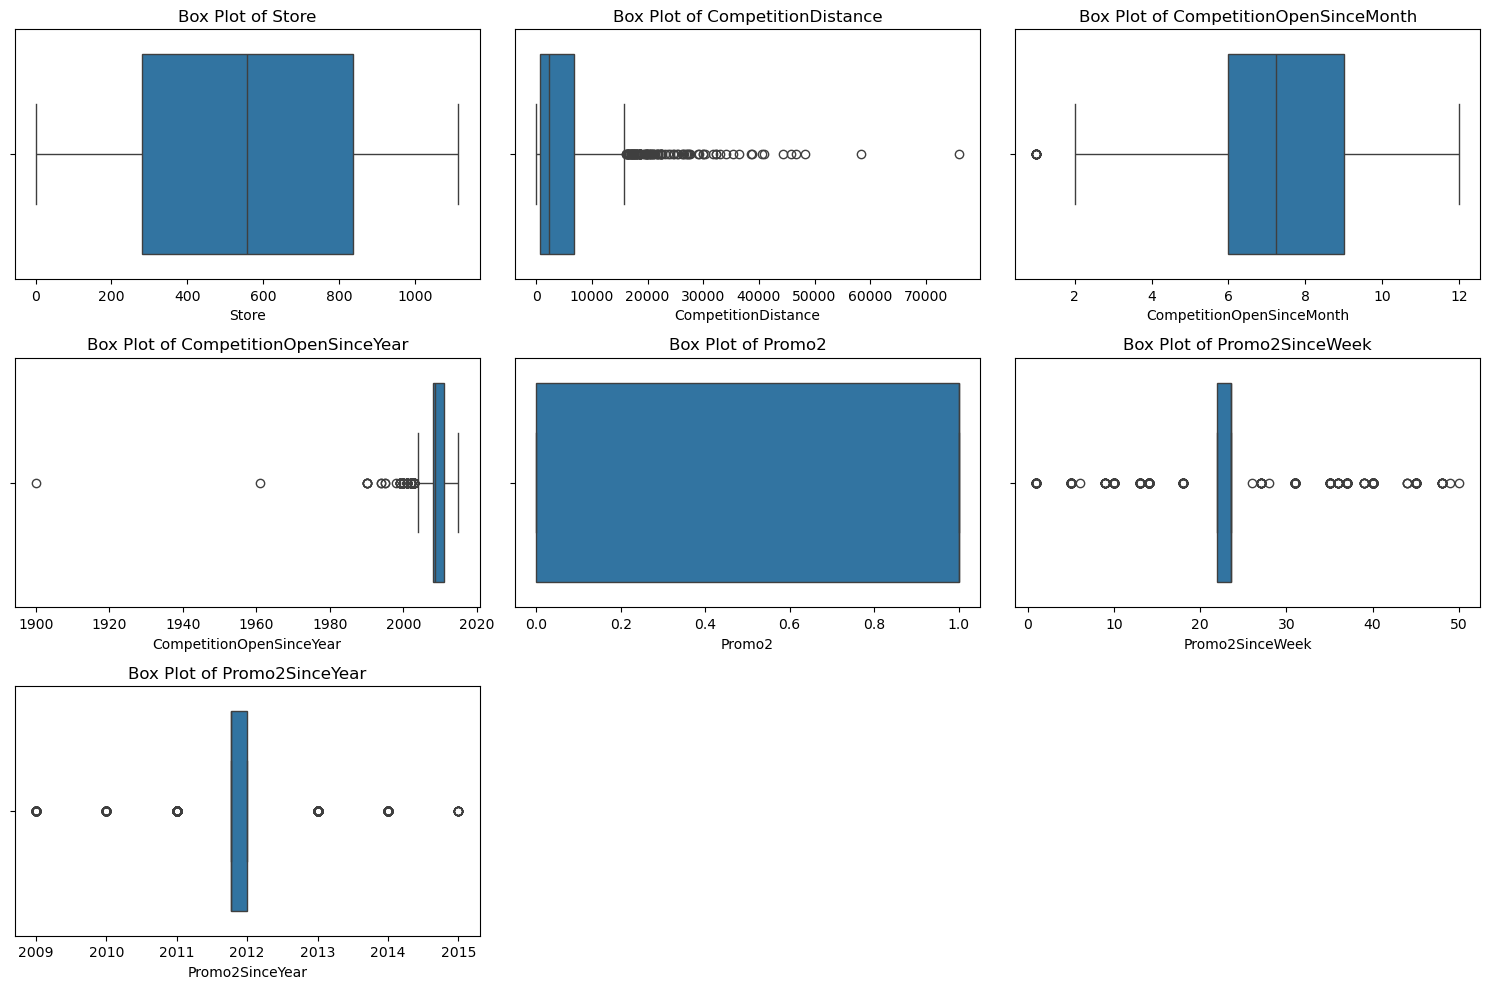

In [373]:
# Loop through all numerical columns and create box plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)  # Adjust the layout based on number of variables
    sns.boxplot(x=store[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


In [410]:
#detecting outliers in numerical variables
for var in num_vars:
    Q1 = store[var].quantile(0.25)
    Q3 = store[var].quantile(0.75)
    IQR = Q3 - Q1

    outliers = store[(store[var] < (Q1 - 1.5 * IQR)) | (store[var] > (Q3 + 1.5 * IQR))]
    print(f'Outliers for {var}:')
    print(outliers)


Outliers for Store:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []
Outliers for CompetitionDistance:
      Store StoreType Assortment  CompetitionDistance  \
4         5         a          a              29910.0   
6         7         a          c              24000.0   
48       49         d          c              18010.0   
52       53         a          c              30360.0   
63       64         d          c              22560.0   
...     ...       ...        ...                  ...   
1037   1038         d          a              17290.0   
1044   1045         a          c              26990.0   
1045   1046         d          c              29070.0   
1068   1069         a          c              18050.0   
1078   1079         a          a              16680.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo

In [203]:
#categorical features

In [345]:
# Select categorical variables
cat_vars = data.select_dtypes(include=['object', 'category']).columns

# Display frequency counts for each categorical variable
for var in cat_vars:
    print(data[var].value_counts())
    print('\n')


StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64


Assortment
a    593
c    513
b      9
Name: count, dtype: int64


PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64




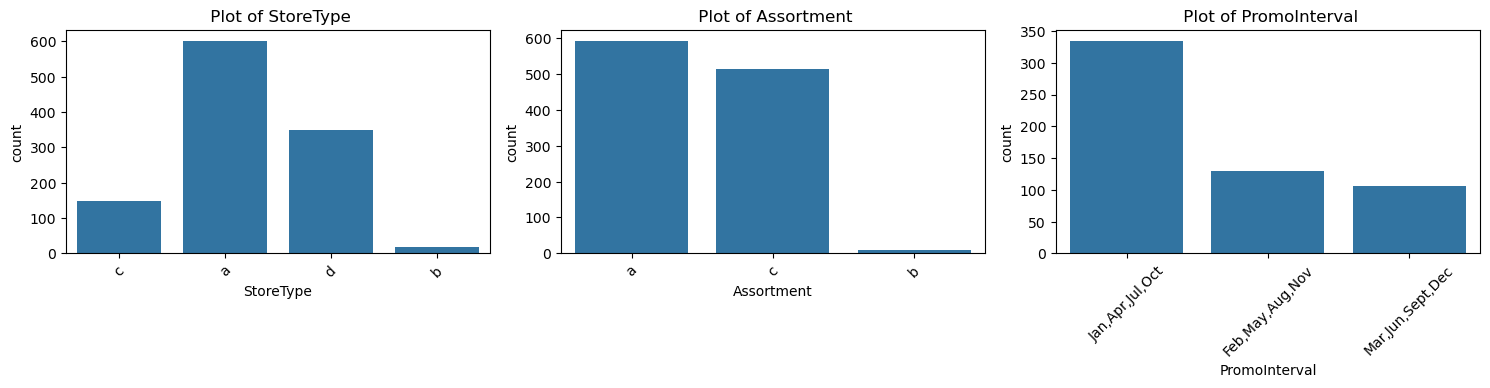

In [446]:
# Loop through all categorical columns and create bar plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)  # Adjust layout based on the number of variables
    sns.countplot(data=store, x=var)
    plt.title(f' Plot of {var}')
    plt.xticks(rotation=45)  # Rotate x labels if needed

plt.tight_layout()
plt.show()


In [404]:
#outlier detection for categorical variables
for var in cat_vars:
    low_freq = data[var].value_counts()[data[var].value_counts() < 20]  # Change the threshold as needed
    if not low_freq.empty:
        print(f'Low frequency categories for {var}:')
        print(low_freq)
        print('\n')

Low frequency categories for StoreType:
StoreType
b    17
Name: count, dtype: int64


Low frequency categories for Assortment:
Assortment
b    9
Name: count, dtype: int64




# bivariate Analysis

In [164]:
#target Variable Exploration to Analyze how each feature relates to the target variable

In [455]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [471]:
target_variable = 'Store'  # choosing the target variable 

In [473]:
numerical_features = store.select_dtypes(include=[np.number]).columns
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [483]:
correlations = store[numerical_features].corr()[target_variable]
correlations

Store                        1.000000
CompetitionDistance         -0.027220
CompetitionOpenSinceMonth   -0.050319
CompetitionOpenSinceYear    -0.004648
Promo2                       0.007486
Promo2SinceWeek              0.007584
Promo2SinceYear              0.039640
Name: Store, dtype: float64

In [442]:
#scatter Plots for continuous variables

In [558]:
# Identify continuous variables
continuous_vars = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

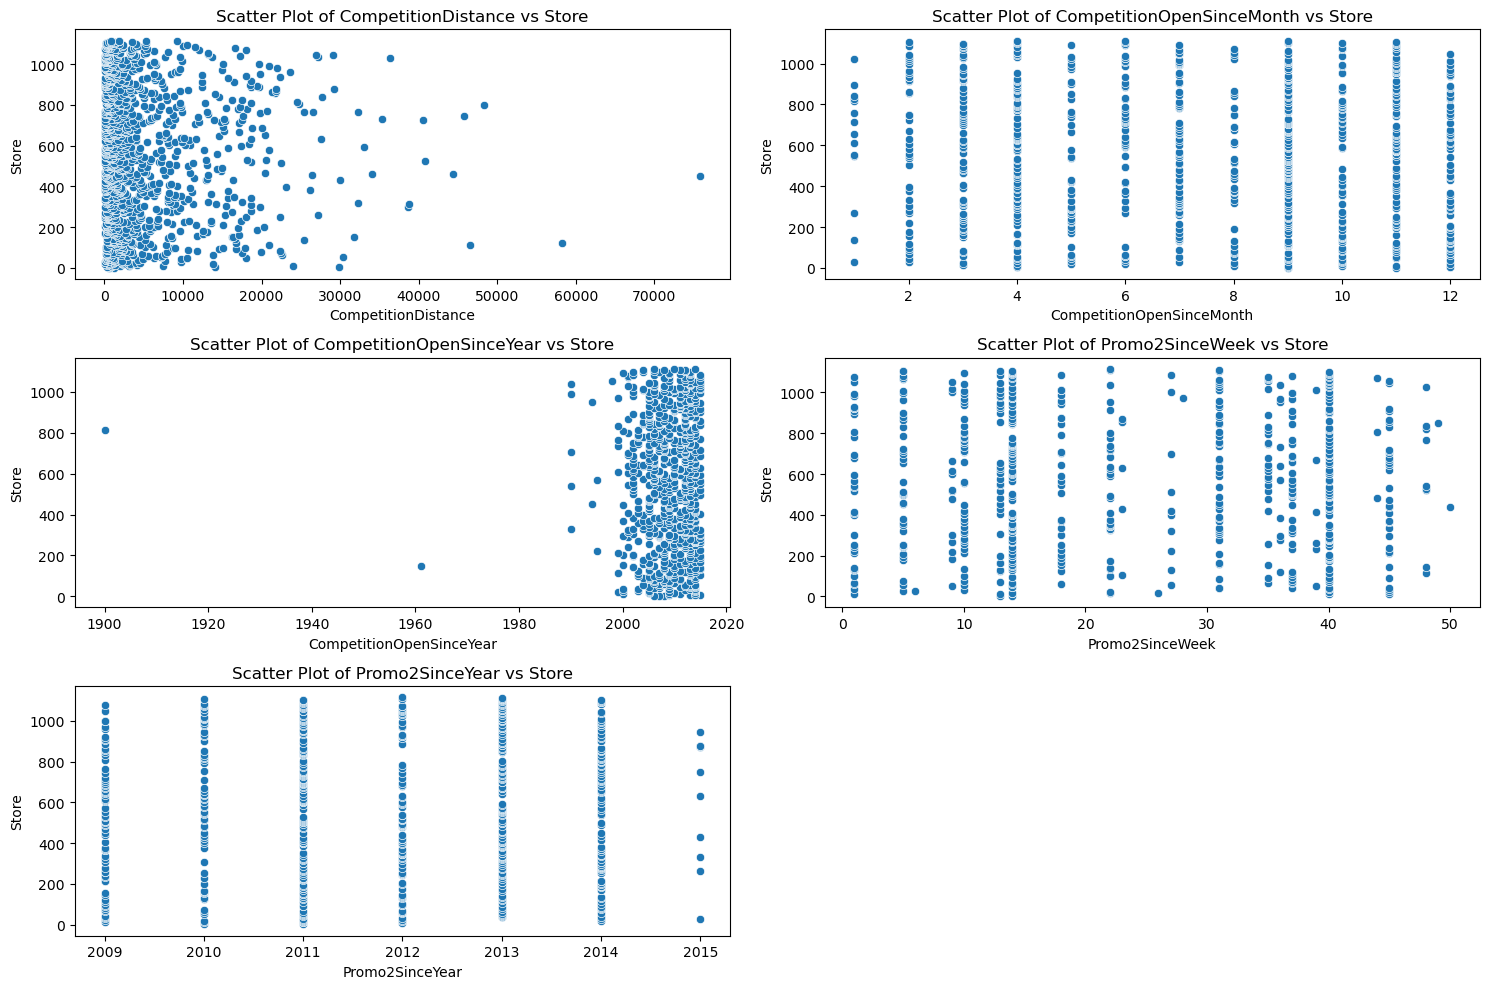

In [560]:
# Set up the plotting area
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 2, i)  # Adjust the grid size based on the number of variables
    sns.scatterplot(data=data, x=var, y='Store')  # Change 'Store' to your actual target variable
    plt.title(f'Scatter Plot of {var} vs Store')
    plt.xlabel(var)
    plt.ylabel('Store')

plt.tight_layout()
plt.show()

In [554]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [168]:
#box Plots for categorical variables against a numerical target

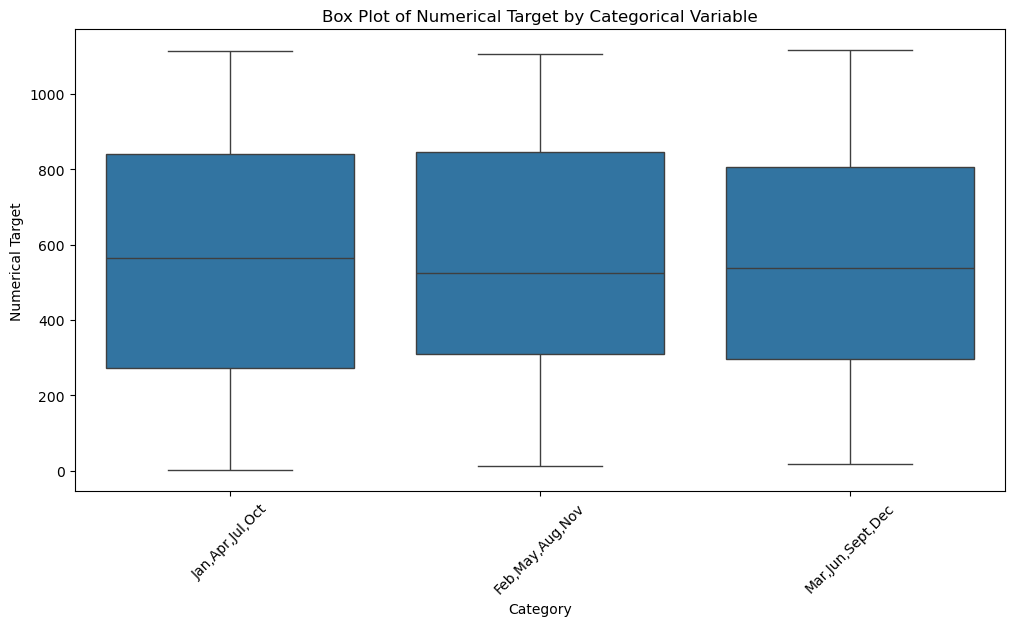

In [576]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='PromoInterval', y='Store', data=store)
plt.title('Box Plot of Numerical Target by Categorical Variable')
plt.xlabel('Category')
plt.ylabel('Numerical Target')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()


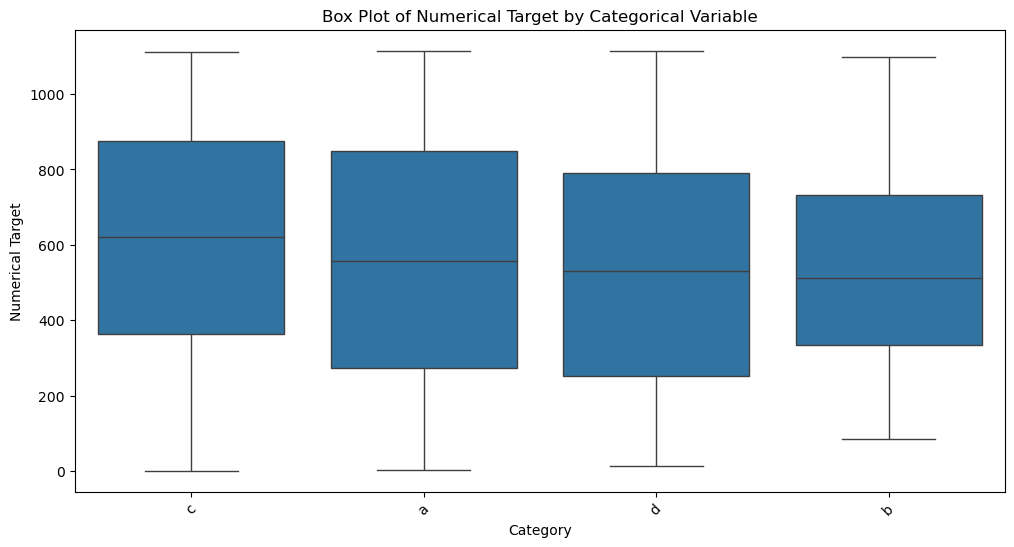

In [574]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreType', y='Store', data=store)
plt.title('Box Plot of Numerical Target by Categorical Variable')
plt.xlabel('Category')
plt.ylabel('Numerical Target')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

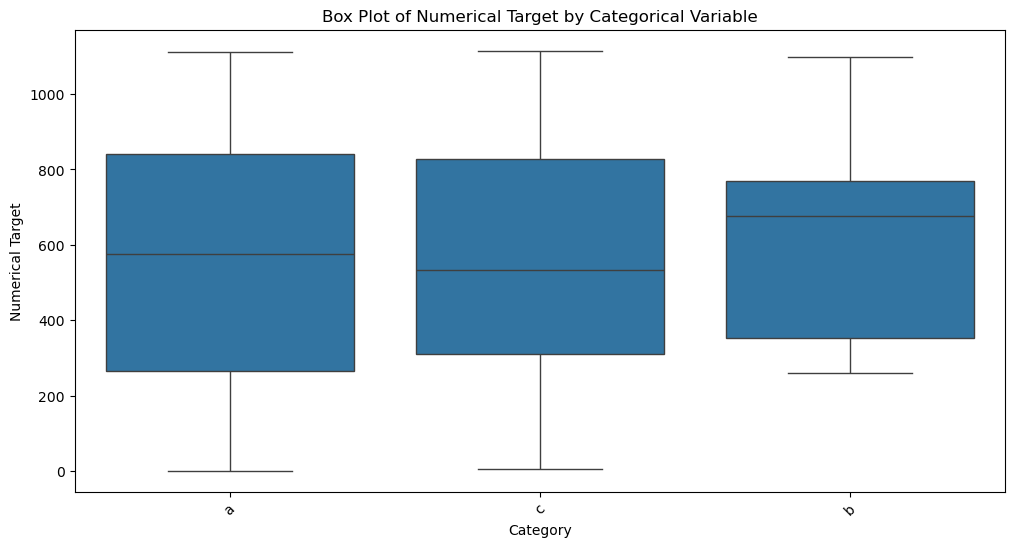

In [572]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Store', data=store)
plt.title('Box Plot of Numerical Target by Categorical Variable')
plt.xlabel('Category')
plt.ylabel('Numerical Target')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

In [76]:
#group By to summarize statistics by category

In [580]:
grouped_data = store.groupby('PromoInterval')  # Replace 'category_col' with your categorical column

In [584]:
summary = grouped_data['Store'].agg(['mean', 'sum', 'count', 'median', 'std'])
summary

,mean,sum,count,median,std
PromoInterval,,,,,
"Feb,May,Aug,Nov",562.838462,73169,130,525.5,312.423952
"Jan,Apr,Jul,Oct",558.656428,491059,879,563.0,324.817482
"Mar,Jun,Sept,Dec",546.622642,57942,106,536.5,312.789978


# correlation Analysis

In [80]:
#visualize correlations between numerical features help to identify highly correlated features to consider for removal or feature engineering

In [592]:
numeric_data = store.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

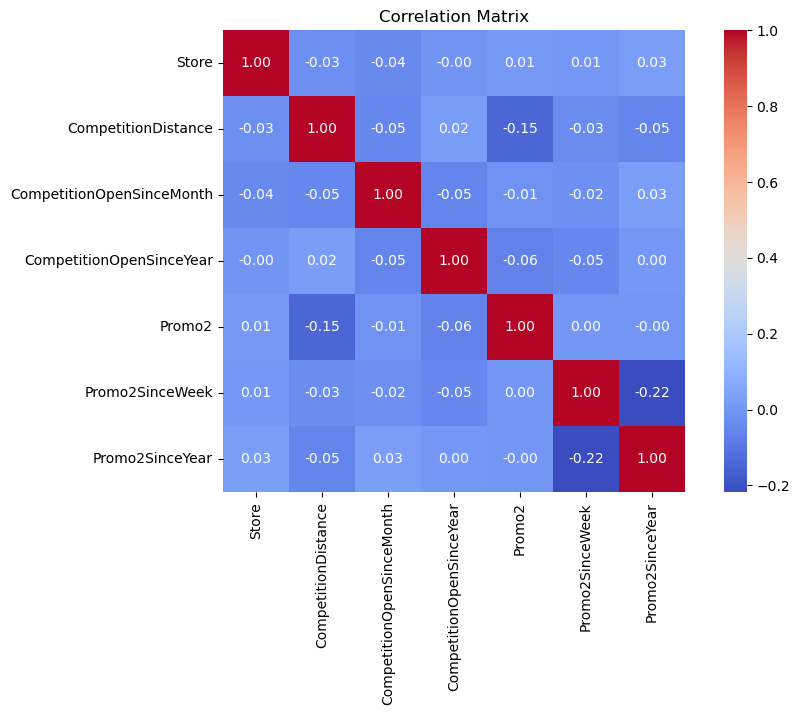

In [594]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(correlation matrix')
plt.show()

# feature Interactions

In [596]:
#Visualizations Use scatter plots to explore potential interactions between pairs of features

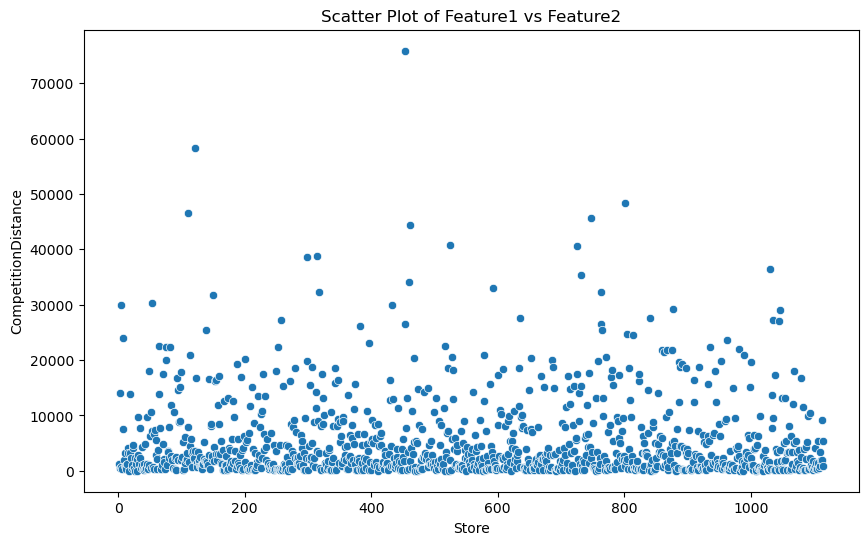

In [602]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='CompetitionDistance', data=store)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('CompetitionDistance')
plt.show()

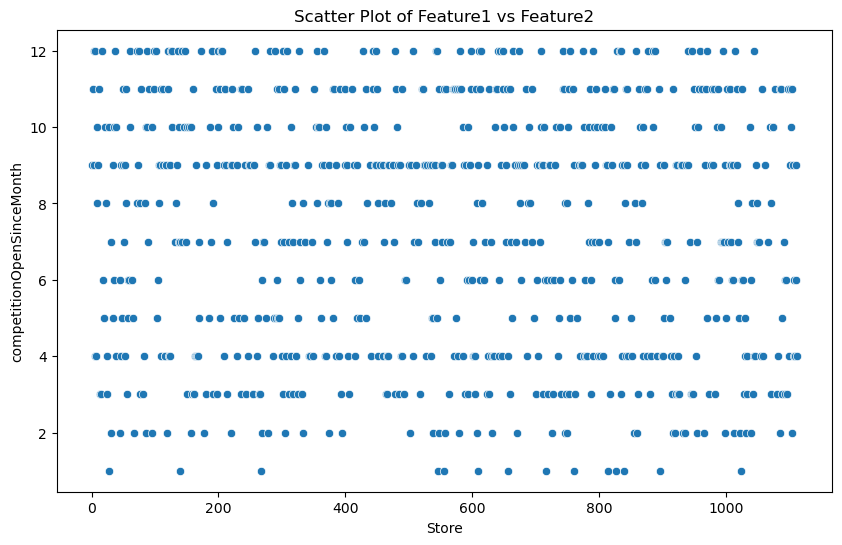

In [614]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='CompetitionOpenSinceMonth', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('competitionOpenSinceMonth')
plt.show()

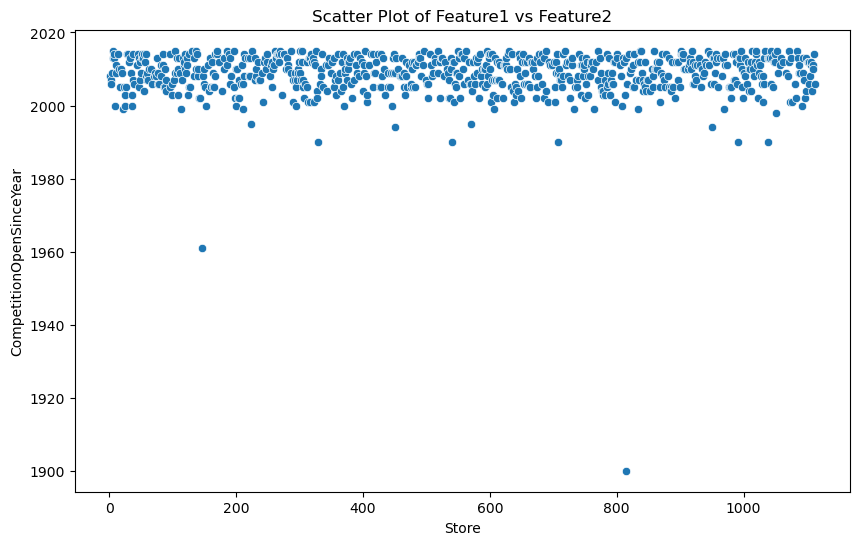

In [610]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='CompetitionOpenSinceYear', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('CompetitionOpenSinceYear')
plt.show()

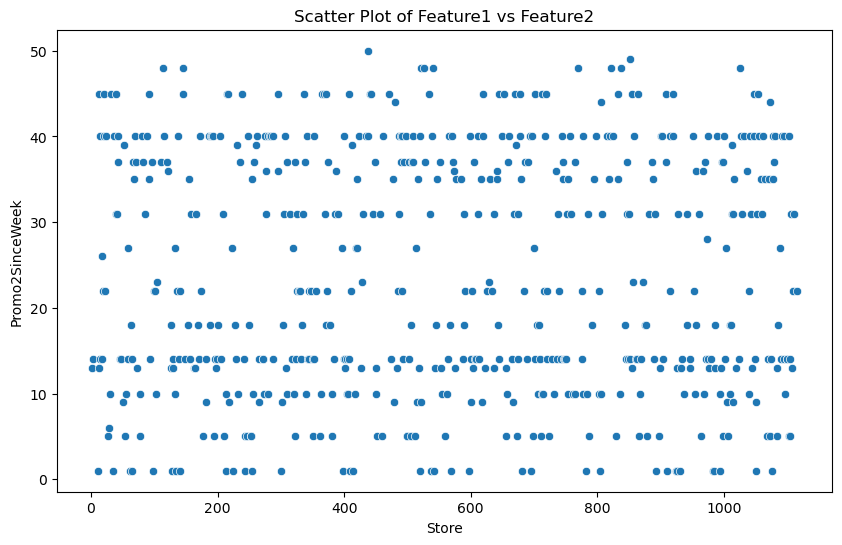

In [612]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Promo2SinceWeek', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('Promo2SinceWeek')
plt.show()

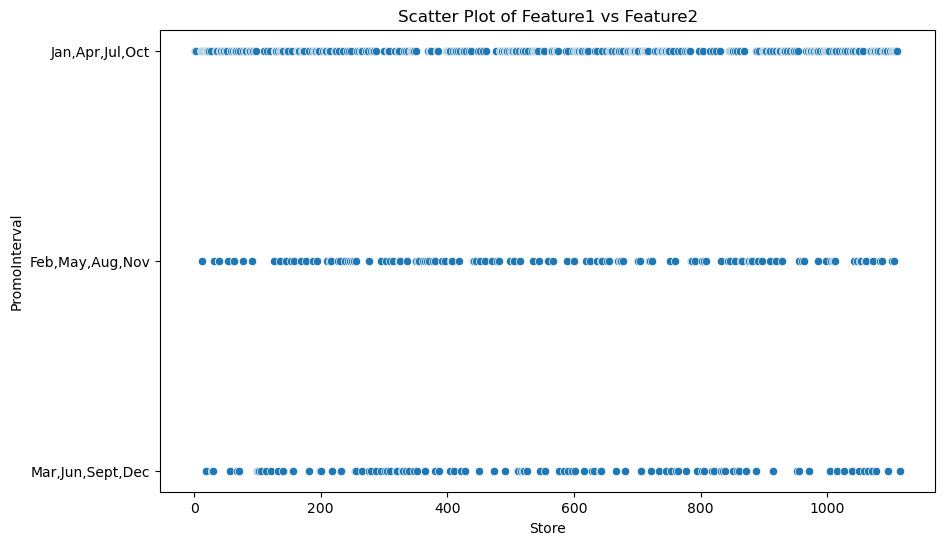

In [616]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='PromoInterval', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('PromoInterval')
plt.show()

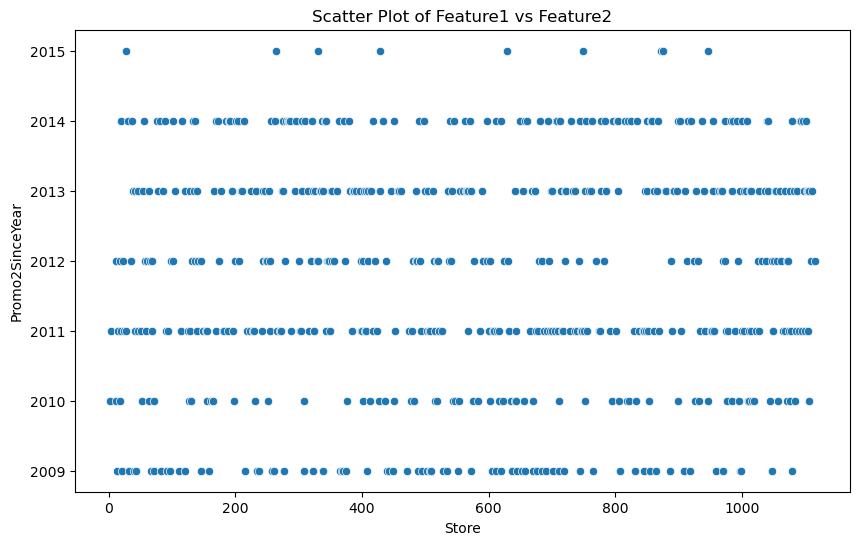

In [618]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Promo2SinceYear', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('Promo2SinceYear')
plt.show()

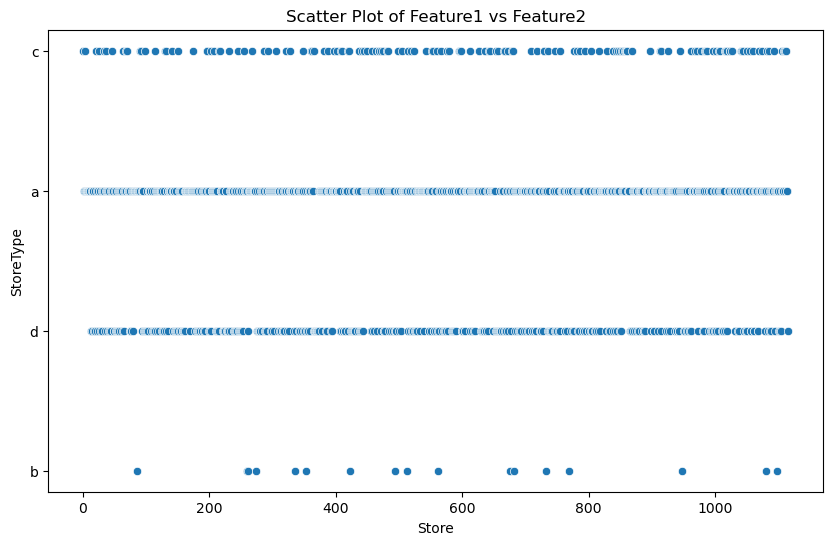

In [620]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='StoreType', data=data)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('StoreType')
plt.show()

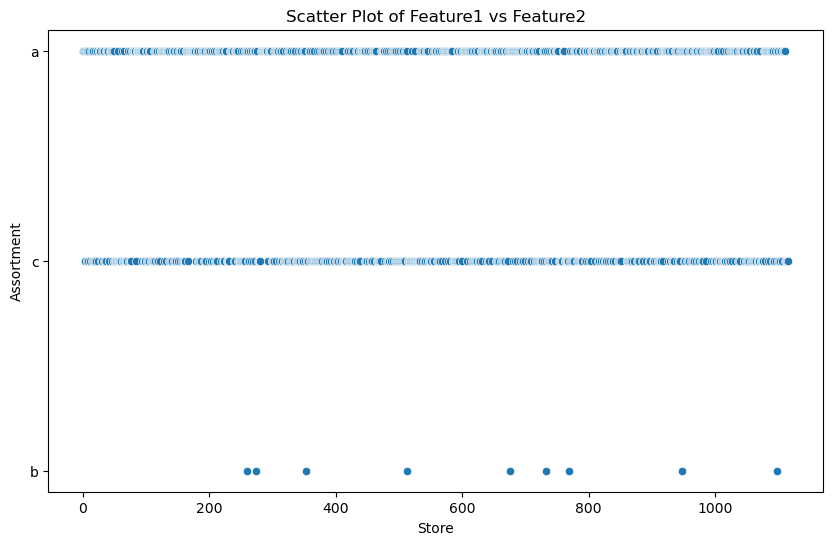

In [626]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Assortment', data=store)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('Assortment')
plt.show()

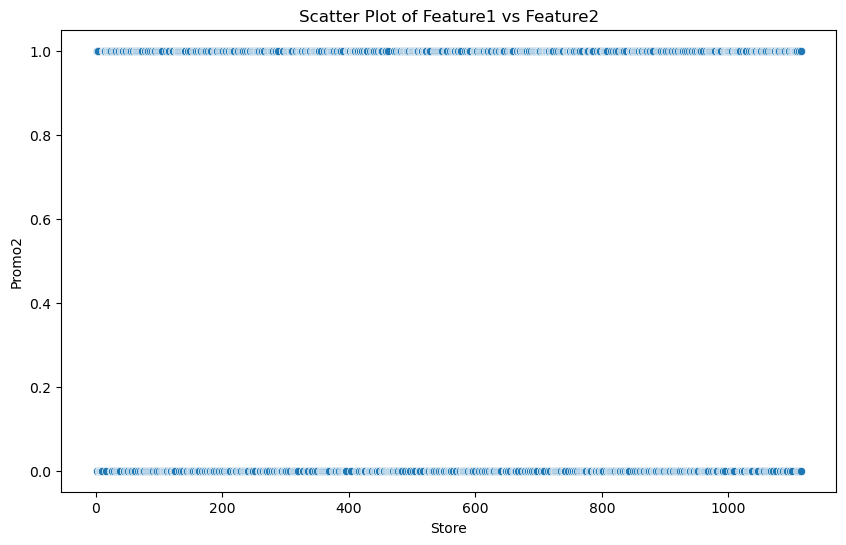

In [628]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Promo2', data=store)  # Replace with your feature names
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Store')
plt.ylabel('Promo2')
plt.show()

In [ ]:
#Cross-Tabulations: For categorical variables, check how different categories interact with one another

In [630]:
cross_tab = pd.crosstab(store['StoreType'], store['Assortment'])  # Replace with your categorical column names
cross_tab

Assortment,a,b,c
StoreType,,,
a,381,0,221
b,7,9,1
c,77,0,71
d,128,0,220


In [632]:
cross_tab = pd.crosstab(store['StoreType'], store['PromoInterval'])  # Replace with your categorical column names
cross_tab

PromoInterval,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
StoreType,,,
a,66,490,46
b,1,15,1
c,16,111,21
d,47,263,38


In [634]:
cross_tab = pd.crosstab(store['Assortment'], store['PromoInterval'])  # Replace with your categorical column names
cross_tab

PromoInterval,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
Assortment,,,
a,75,475,43
b,1,7,1
c,54,397,62


# TASK-1

In [644]:
#steps for data cleaning using  pipeline to detect and handle outliers and missing data.

In [646]:
#handling missing data

In [648]:
#Identify Missing Data check for missing values in your dataset.

In [656]:
print(store.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [652]:
#create a Function to Handle Missing Data that either fills missing values or drops them

In [664]:
def handle_missing_data(store):
    # Example: Fill missing values with the mean for numerical columns
    for col in store.select_dtypes(include=[np.number]).columns:
        store[col].fillna(store[col].mean(), inplace=True)
    # Optionally, for categorical columns, you might want to fill with the mode
    for col in store.select_dtypes(include=['object']).columns:
        store[col].fillna(store[col].mode()[0], inplace=True)
    return store


In [670]:
def detect_outliers(store):
    for col in store.select_dtypes(include=[np.number]).columns:
        Q1 = store[col].quantile(0.25)
        Q3 = store[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        store = store[(store[col] >= lower_bound) & (store[col] <= upper_bound)]
    return store


In [676]:
cleaning_pipeline = Pipeline(steps=[
    ('handle_missing', FunctionTransformer(handle_missing_data)),
    ('detect_outliers', FunctionTransformer(detect_outliers))
])

# Apply the pipeline to your data
cleaned_data = cleaning_pipeline.fit_transform(store)


/var/folders/y3/bgq7_1ts2x50tvcr_691gg480000gn/T/ipykernel_3886/3531537108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store[col].fillna(store[col].mean(), inplace=True)
/var/folders/y3/bgq7_1ts2x50tvcr_691gg480000gn/T/ipykernel_3886/3531537108.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [681]:
cleaned_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.000000,2009.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
5,6,a,a,310.0,12.000000,2013.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
7,8,a,a,7520.0,10.000000,2014.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
9,10,a,a,3160.0,9.000000,2009.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.000000,2004.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.000000,2010.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [683]:
#Check Distribution of Promotions: Use the value_counts() method to get the distribution of the promotion variable in both

In [687]:
train_promotion_counts = train['Promo'].value_counts(normalize=True) 
test_promotion_counts = test['Promo'].value_counts(normalize=True)

Text(0, 0.5, 'Count')

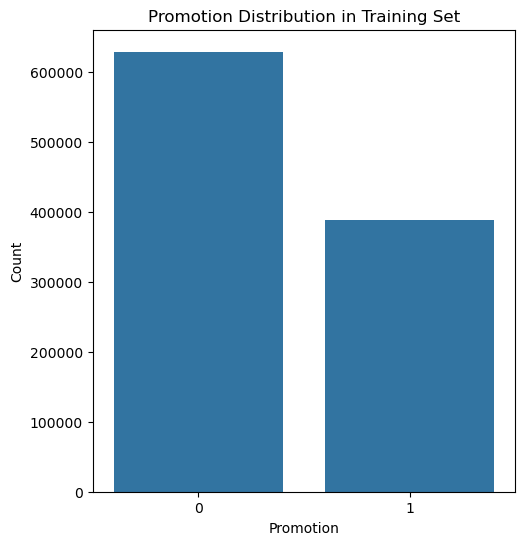

In [693]:
plt.figure(figsize=(12, 6))

# Plotting train data
plt.subplot(1, 2, 1)
sns.countplot(x='Promo', data=train)
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promotion')
plt.ylabel('Count')

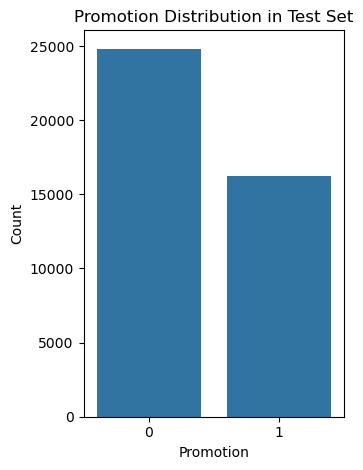

In [695]:
# Plotting test data
plt.subplot(1, 2, 2)
sns.countplot(x='Promo', data=test)
plt.title('Promotion Distribution in Test Set')
plt.xlabel('Promotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [697]:
#Check & compare sales behavior before, during, and after holidays

In [ ]:
#we should merge the store and traindataset to do the above question cause date and sales are located there.

In [704]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [795]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [728]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.000000,2007.000000,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.000000,2006.000000,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.000000,2009.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.000000,2015.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.000000,2014.000000,1,31.000000,2013.000000,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1113,1114,a,c,870.0,7.224704,2008.668857,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [731]:
#Identify Common and Unique Columns
#Determine which columns are common between the two datasets and which are unique to each.

In [813]:
common_columns = store.columns.intersection(train.columns)
unique_to_store = store.columns.difference(train.columns)
unique_to_train = train.columns.difference(store.columns)

In [815]:
common_columns

Index(['Store'], dtype='object')

In [817]:
unique_to_store

Index(['Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StoreType'],
      dtype='object')

In [819]:
unique_to_train

Index(['Customers', 'Date', 'DayOfWeek', 'Open', 'Promo', 'Sales',
       'SchoolHoliday', 'StateHoliday'],
      dtype='object')

In [841]:
# Merge datasets on common columns with an outer join
merged_data = pd.merge(store, train, how='outer', on=list(common_columns))

In [843]:
merged_data = pd.concat([store, train], axis=0, ignore_index=True)

In [912]:
merged_data.fillna(value={'DayOfWeek': merged_data['DayOfWeek'].mean()}, inplace=True)
merged_data.fillna(value={'Sales': merged_data['Sales'].mean()}, inplace=True)
merged_data.fillna(value={'Customers': merged_data['Customers'].mean()}, inplace=True)
merged_data.fillna(value={'Open': merged_data['Open'].mean()}, inplace=True)
merged_data.fillna(value={'Promo': merged_data['Promo'].mean()}, inplace=True)
merged_data.fillna(value={'SchoolHoliday': merged_data['SchoolHoliday'].mean()}, inplace=True)
merged_data.fillna(value={'Promo2': merged_data['Promo2'].mean()}, inplace=True)
merged_data.fillna(value={'Promo2SinceWeek': merged_data['Promo2SinceWeek'].mean()}, inplace=True)
merged_data.fillna(value={'Promo2SinceYear': merged_data['Promo2SinceYear'].mean()}, inplace=True)
merged_data.fillna(value={'CompetitionOpenSinceMonth': merged_data['CompetitionOpenSinceMonth'].mean()}, inplace=True)
merged_data.fillna(value={'CompetitionOpenSinceYear': merged_data['CompetitionOpenSinceYear'].mean()}, inplace=True)

In [914]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [916]:
merged_data.fillna(value={'Date': merged_data['Date'].mean()}, inplace=True)

In [918]:
merged_data.fillna(value={'StateHoliday': merged_data['StateHoliday'].mode()[0]}, inplace=True)
merged_data.fillna(value={'StoreType': merged_data['StoreType'].mode()[0]}, inplace=True)
merged_data.fillna(value={'Assortment': merged_data['Assortment'].mode()[0]}, inplace=True)
merged_data.fillna(value={'PromoInterval': merged_data['PromoInterval'].mode()[0]}, inplace=True)

In [920]:
merged_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.000000,9.000000,2008.000000,0.000000,23.595447,2011.763573,"Jan,Apr,Jul,Oct",3.998341,2014-04-11 01:30:42.846061824,5773.818972,633.145946,0.830107,0.381515,0,0.178647
1,2,a,a,570.000000,11.000000,2007.000000,1.000000,13.000000,2010.000000,"Jan,Apr,Jul,Oct",3.998341,2014-04-11 01:30:42.846061824,5773.818972,633.145946,0.830107,0.381515,0,0.178647
2,3,a,a,14130.000000,12.000000,2006.000000,1.000000,14.000000,2011.000000,"Jan,Apr,Jul,Oct",3.998341,2014-04-11 01:30:42.846061824,5773.818972,633.145946,0.830107,0.381515,0,0.178647
3,4,c,c,620.000000,9.000000,2009.000000,0.000000,23.595447,2011.763573,"Jan,Apr,Jul,Oct",3.998341,2014-04-11 01:30:42.846061824,5773.818972,633.145946,0.830107,0.381515,0,0.178647
4,5,a,a,29910.000000,4.000000,2015.000000,0.000000,23.595447,2011.763573,"Jan,Apr,Jul,Oct",3.998341,2014-04-11 01:30:42.846061824,5773.818972,633.145946,0.830107,0.381515,0,0.178647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018319,1111,a,a,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2.000000,2013-01-01 00:00:00.000000000,0.000000,0.000000,0.000000,0.000000,a,1.000000
1018320,1112,a,a,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2.000000,2013-01-01 00:00:00.000000000,0.000000,0.000000,0.000000,0.000000,a,1.000000
1018321,1113,a,a,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2.000000,2013-01-01 00:00:00.000000000,0.000000,0.000000,0.000000,0.000000,a,1.000000
1018322,1114,a,a,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2.000000,2013-01-01 00:00:00.000000000,0.000000,0.000000,0.000000,0.000000,a,1.000000


In [922]:
merged_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [924]:
#Define Holidays
#Create a list of holidays and the corresponding periods for analysis.

In [938]:
# Check the unique values in the StateHoliday and SchoolHoliday columns
print(merged_data['StateHoliday'].unique())
print(merged_data['SchoolHoliday'].unique())

['0' 'a' 'b' 'c']
[0.17864667 1.         0.        ]


In [940]:
# Create a new column to categorize sales behavior
def categorize_holiday(row):
    if row['StateHoliday'] != '0':  # Any state holiday
        return 'State Holiday'
    elif row['SchoolHoliday'] == 1:  # Assuming SchoolHoliday is a binary indicator
        return 'School Holiday'
    else:
        return 'Regular Day'

data['Holiday_Type'] = data.apply(categorize_holiday, axis=1)

KeyError: 'StateHoliday'